In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

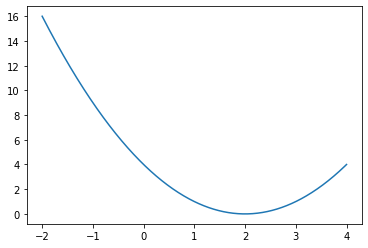

In [2]:
def f(W):
    return W**2 -4*W + 4

x = np.linspace(-2,4,500)
y = f(x)
fig, ax = plt.subplots()
ax.plot(x, y);

We'll need the derivative of $f$ for gradient descent

In [3]:
# derivative of f
def f_prime(W):
    return 2*W - 4

Implement gradient descent with adam. Don't forget to bias correct $\nu$ and $r$ (see notes to the left).

In [4]:
### edTest(test_adam_descent) ###
# DO NOT REMOVE THE LINE ABOVE
# parameter values suggested in original Adam paper
def adam_descent(W, epsilon, rho1=0.9, rho2=0.999, delta=1e-8):
    '''performs gradient descent with Adam optimizer
       W is the initial weight value
       All default parameters are suggested in original Adam paper except
       epsilon which we should think of as the learning rate (try values <= 1)'''


    W_prev = 0 # useful for checking convergence...
    v = r = 0 # no 'memory' to start with
    t = 0 # iteration counter for bias correction

    # append current W to a running array of weight
    # values from each iteration
    Ws = [W]
    while (W_prev == W): #iterate until converged
        
        W_prev = W
        t += 1
        v = rho1*v + (1-rho1) * f_prime(W)
        r = rho2*r + (1-rho2) * (f_prime(W) ** 2)
        v = v/(1 - rho1 ** t)
        r = r/(1 - rho2 ** t)
        
        W = W - epsilon / (delta + np.sqrt(r)) * v
        Ws.append(W)
    return Ws

Plot the descent from 6 random starting values for W.

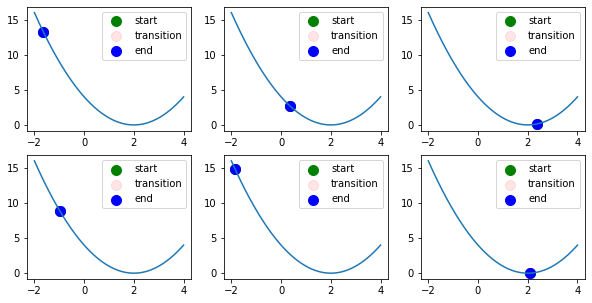

In [5]:
# view several descents using adam
epsilon = .01 # try an epsilon <= 1

fig, axes = plt.subplots(2,3, figsize=(10,5))
for ax in axes.ravel():
    W = np.random.uniform(-2,4) # initial random weight
    Ws = adam_descent(W, epsilon=epsilon)
    ax.plot(x, y)

    ax.scatter(Ws[0], f(Ws[0]), c='green', s=100, label='start')
    ax.scatter(np.array(Ws), f(np.array(Ws)), c='r', s=100, alpha=0.1, label='transition')
    ax.scatter(Ws[-1], f(Ws[-1]), c='blue', s=100, label='end') # converged value
    ax.legend();